----
## **<font color="crimson"> Actualizar bases de compuestos</font>**

In [1]:
pip install cartopy

  Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.9 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install h5netcdf 

  Using cached h5netcdf-1.6.1-py3-none-any.whl.metadata (13 kB)
  Using cached h5py-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
Using cached h5netcdf-1.6.1-py3-none-any.whl (49 kB)
Using cached h5py-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xarray

  Using cached xarray-2025.4.0-py3-none-any.whl.metadata (12 kB)
Using cached xarray-2025.4.0-py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cftime

  Using cached cftime-1.6.4.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.7 kB)
Using cached cftime-1.6.4.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cmcrameri

  Using cached cmcrameri-1.9-py3-none-any.whl.metadata (4.6 kB)
Using cached cmcrameri-1.9-py3-none-any.whl (277 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install toolz

  Using cached toolz-1.0.0-py3-none-any.whl.metadata (5.1 kB)
Using cached toolz-1.0.0-py3-none-any.whl (56 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#### Concat temperatura e índice PNA

In [8]:
# E5
file_t2m_idxp = 'datasetsok/t2mE5_idx_std2+.nc'
file_t2m_idxn = 'datasetsok/t2mE5_idx_std2-.nc'
# # HG
file_tas_idxp = 'datasetsok/tasHG_idx_std2+.nc'
file_tas_idxn = 'datasetsok/tasHG_idx_std2-.nc'

In [9]:
t2m_idxp_ds = xr.open_dataset(file_t2m_idxp)
t2m_idxn_ds = xr.open_dataset(file_t2m_idxn)

tas_idxp_ds = xr.open_dataset(file_tas_idxp)
tas_idxn_ds = xr.open_dataset(file_tas_idxn)

In [10]:
t2m_idxp = t2m_idxp_ds['t2m']
t2m_idxn = t2m_idxn_ds['t2m']

tas_idxp = tas_idxp_ds['tas']
tas_idxn = tas_idxn_ds['tas']

In [11]:
#promedio anual 
t2m_idxp_vals = t2m_idxp.mean(dim='time')
t2m_idxn_vals = t2m_idxn.mean(dim='time')

tas_idxp_vals = tas_idxp.mean(dim='time')
tas_idxn_vals = tas_idxn.mean(dim='time')

In [12]:
# DJF
t2m_idxp_djf = t2m_idxp.groupby(t2m_idxp.time.dt.season).mean(dim='time')[0]
t2m_idxn_djf = t2m_idxn.groupby(t2m_idxn.time.dt.season).mean(dim='time')[0]

tas_idxp_djf = tas_idxp.groupby(tas_idxp.time.dt.season).mean(dim='time')[0]
tas_idxn_djf = tas_idxn.groupby(tas_idxn.time.dt.season).mean(dim='time')[0]

#### Concat viento e índice PNA

In [13]:
# E5
file_uE_idxp = 'datasetsok/uE5_idx_std2+.nc'
file_vE_idxp = 'datasetsok/vE5_idx_std2+.nc'

file_uE_idxn = 'datasetsok/uE5_idx_std2-.nc'
file_vE_idxn = 'datasetsok/vE5_idx_std2-.nc'

# HG
file_uH_idxp = 'datasetsok/uHG_idx_std2+.nc'
file_vH_idxp = 'datasetsok/vHG_idx_std2+.nc'

file_uH_idxn = 'datasetsok/uHG_idx_std2-.nc'
file_vH_idxn = 'datasetsok/vHG_idx_std2-.nc'

In [14]:
uE_idxp = xr.open_dataset(file_uE_idxp)
vE_idxp = xr.open_dataset(file_vE_idxp)

uE_idxn = xr.open_dataset(file_uE_idxn)
vE_idxn = xr.open_dataset(file_vE_idxn)

# hg
uH_idxp = xr.open_dataset(file_uH_idxp)
vH_idxp = xr.open_dataset(file_vH_idxp)

uH_idxn = xr.open_dataset(file_uH_idxn)
vH_idxn = xr.open_dataset(file_vH_idxn)

In [15]:
uE_idxp = uE_idxp['u']
vE_idxp = vE_idxp['v']

uE_idxn = uE_idxn['u']
vE_idxn = vE_idxn['v']

uH_idxp = uH_idxp['ua']
vH_idxp = vH_idxp['va']

uH_idxn = uH_idxn['ua']
vH_idxn = vH_idxn['va']

In [16]:
#promedio anual 
uE_idxp_vals = uE_idxp.mean(dim='time')
vE_idxp_vals = vE_idxp.mean(dim='time')

uE_idxn_vals = uE_idxn.mean(dim='time')
vE_idxn_vals = vE_idxn.mean(dim='time')


uH_idxp_vals = uH_idxp.mean(dim='time')
# vH_idxp_vals = vH_idxp.mean(dim='time')

uH_idxn_vals = uH_idxn.mean(dim='time')
vH_idxn_vals = vH_idxn.mean(dim='time')

In [17]:
# DJF
uE_idxp_djf = uE_idxp.groupby(uE_idxp.time.dt.season).mean(dim='time')[0]
vE_idxp_djf = vE_idxp.groupby(vE_idxp.time.dt.season).mean(dim='time')[0]

uE_idxn_djf = uE_idxn.groupby(uE_idxn.time.dt.season).mean(dim='time')[0]
vE_idxn_djf = vE_idxn.groupby(vE_idxn.time.dt.season).mean(dim='time')[0]


uH_idxp_djf = uH_idxp.groupby(uH_idxp.time.dt.season).mean(dim='time')[0]
vH_idxp_djf = vH_idxp.groupby(vH_idxp.time.dt.season).mean(dim='time')[0]

uH_idxn_djf = uH_idxn.groupby(uH_idxn.time.dt.season).mean(dim='time')[0]
vH_idxn_djf = vH_idxn.groupby(vH_idxn.time.dt.season).mean(dim='time')[0]

#### Concat geopotencial e índice PNA 

In [18]:
idxp_gph_file = 'datasetsok/gph_idx_std+.nc'
idxn_gph_file = 'datasetsok/gph_idx_std-.nc'

idxp_zg_file = 'datasetsok/zg500_idx_std+.nc' 
idxn_zg_file = 'datasetsok/zg500_idx_std-.nc'

In [19]:
#e5
idxp_gph_ds = xr.open_dataset(idxp_gph_file)
idxn_gph_ds = xr.open_dataset(idxn_gph_file)
#hg
idxp_zg_ds = xr.open_dataset(idxp_zg_file)
idxn_zg_ds = xr.open_dataset(idxn_zg_file)

In [20]:
idxp_gph = idxp_gph_ds['z']
idxn_gph = idxn_gph_ds['z']
idxp_gph = idxp_gph.sel(pressure_level=500)
idxn_gph = idxn_gph.sel(pressure_level=500)

idxp_zg = idxp_zg_ds['zg500']
idxn_zg = idxn_zg_ds['zg500']

In [21]:
#promedio anual 
idxp_gph_vals = idxp_gph.mean(dim='time')
idxn_gph_vals = idxn_gph.mean(dim='time')

idxp_zg_vals = idxp_zg.mean(dim='time')
idxn_zg_vals = idxn_zg.mean(dim='time')


In [22]:
idxp_gph_djf = idxp_gph.groupby(idxp_gph.time.dt.season).mean(dim='time')[0] 
idxn_gph_djf = idxn_gph.groupby(idxn_gph.time.dt.season).mean(dim='time')[0] 

idxp_zg_djf =idxp_zg.groupby(idxp_zg.time.dt.season).mean(dim='time')[0]
idxn_zg_djf =idxn_zg.groupby(idxn_zg.time.dt.season).mean(dim='time')[0]

In [23]:
g = 9.807
idxn_gph_vals = idxn_gph_vals/g
idxp_gph_vals = idxp_gph_vals/g

idxn_gph_djf = idxn_gph_djf/g
idxp_gph_djf = idxp_gph_djf/g


#### Concat geopotencial e índice PNA ERA5

## **<font color="Crimson"> TEMPERATURA </font>**

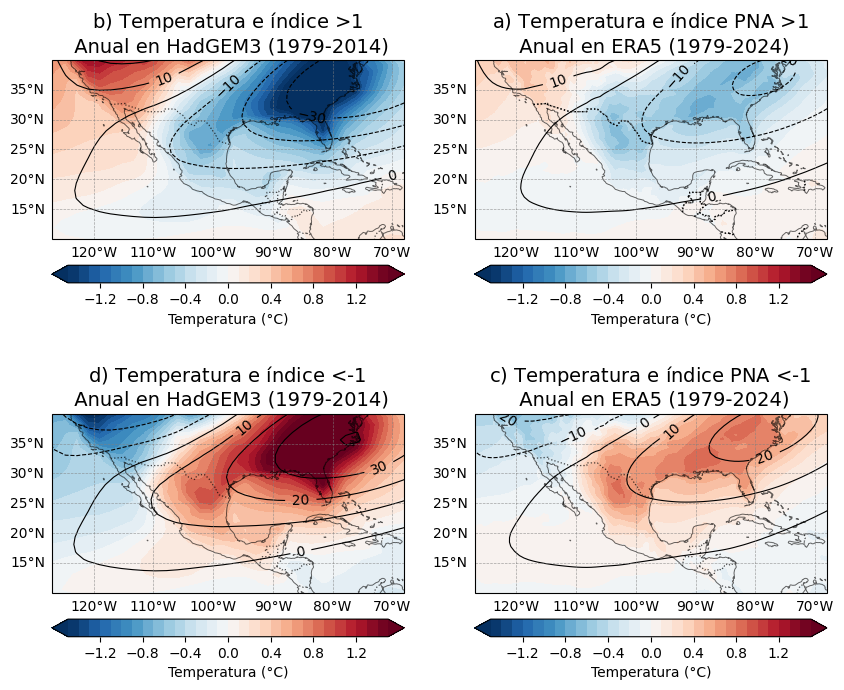

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})#, constrained_layout=True)
plt.subplots_adjust(wspace=0.2, hspace=0.35)
axs = axs.flatten()

# Subplot 1: ANUAL ÍNDICE >1 E5
ax = axs[1]
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(t2m_idxp_vals.longitude,t2m_idxp_vals.latitude,t2m_idxp_vals,levels=np.arange(-1.5,1.51,0.1),cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_gph_vals.longitude,idxp_gph_vals.latitude,idxp_gph_vals, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=10)
ax.set_title('a$)$ Temperatura e índice PNA >1 \n Anual en ERA5 (1979-2024)', fontsize=14)

# Subplot 2: ANUAL ÍNDICE <-1 E5
ax = axs[3]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(t2m_idxn_vals.longitude,t2m_idxn_vals.latitude,t2m_idxn_vals,levels=np.arange(-1.5,1.51,0.1),cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxn_gph_vals.longitude,idxn_gph_vals.latitude,idxn_gph_vals, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=10)
ax.set_title('c$)$ Temperatura e índice PNA <-1 \n Anual en ERA5 (1979-2024)', fontsize=14)

# Subplot 3: ANUAL ÍNDICE >1 HG
ax = axs[0]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(tas_idxp_vals.lon,tas_idxp_vals.lat,tas_idxp_vals,levels=np.arange(-1.5,1.51,0.1),cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_zg_vals.lon,idxp_zg_vals.lat,idxp_zg_vals, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=10)
ax.set_title('b$)$ Temperatura e índice >1 \n Anual en HadGEM3 (1979-2014)', fontsize=14)

# Subplot 4: ANUAL ÍNDICE <-1 HG
ax = axs[2]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(tas_idxn_vals.lon,tas_idxn_vals.lat,tas_idxn_vals,levels=np.arange(-1.5,1.51,0.1),cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxn_zg_vals.lon,idxn_zg_vals.lat,idxn_zg_vals, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=10)
ax.set_title('d$)$ Temperatura e índice <-1 \n Anual en HadGEM3 (1979-2014)', fontsize=14)

# plt.show()

plt.savefig('figsok/Temp_anualyPNA')

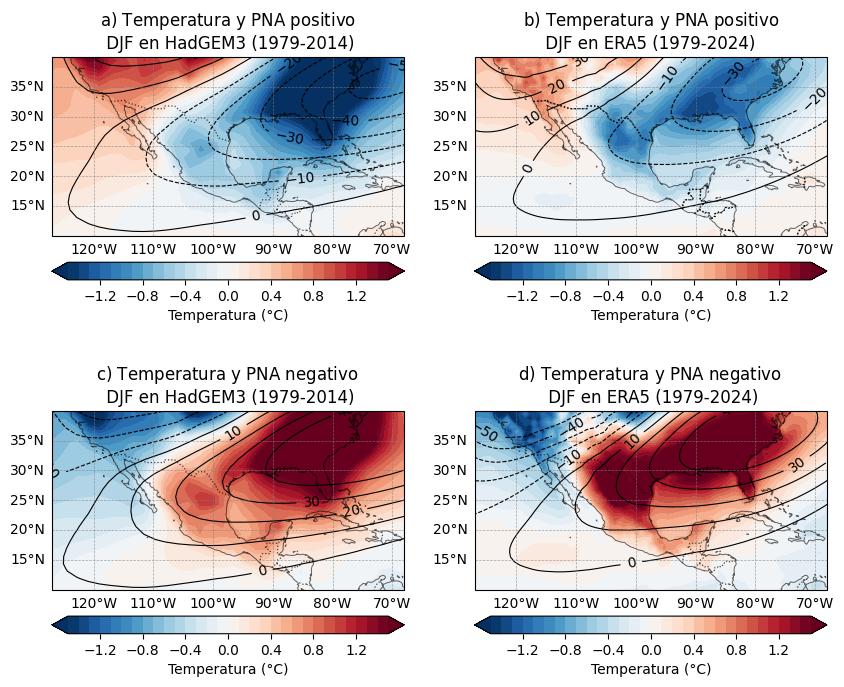

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})#, constrained_layout=True)
plt.subplots_adjust(wspace=0.2, hspace=0.35)
axs = axs.flatten()

# Subplot 1: ANUAL ÍNDICE >1 E5
ax = axs[1]
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(t2m_idxp_djf.longitude,t2m_idxp_djf.latitude,t2m_idxp_djf,levels=np.arange(-1.5,1.51,0.1),cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_gph_djf.longitude,idxp_gph_djf.latitude,idxp_gph_djf, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=10)
ax.set_title('b$)$ Temperatura y PNA positivo\n DJF en ERA5 (1979-2024) ', fontsize=12)

# Subplot 2: ANUAL ÍNDICE <-1 E5
ax = axs[3]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(t2m_idxn_djf.longitude,t2m_idxn_djf.latitude,t2m_idxn_djf,levels=np.arange(-1.5,1.51,0.1),cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxn_gph_djf.longitude,idxn_gph_djf.latitude,idxn_gph_djf, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=10)
ax.set_title('d$)$ Temperatura y PNA negativo \n DJF en ERA5 (1979-2024)', fontsize=12)

# Subplot 3: ANUAL ÍNDICE >1 HG
ax = axs[0]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(tas_idxp_djf.lon,tas_idxp_djf.lat,tas_idxp_djf,levels=np.arange(-1.5,1.51,0.1),cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_zg_djf.lon,idxp_zg_djf.lat,idxp_zg_djf, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=10)
ax.set_title('a$)$ Temperatura y PNA positivo \n DJF en HadGEM3 (1979-2014)', fontsize=12)

# Subplot 4: ANUAL ÍNDICE <-1 HG
ax = axs[2]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(tas_idxn_djf.lon,tas_idxn_djf.lat,tas_idxn_djf,levels=np.arange(-1.5,1.51,0.1),cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxn_zg_djf.lon,idxn_zg_djf.lat,idxn_zg_djf, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=10)
ax.set_title('c$)$ Temperatura y PNA negativo \n DJF en HadGEM3 (1979-2014)', fontsize=12)

# plt.show()

plt.savefig('figsok/Temp_DJFyPNA')

## **<font color="Crimson"> VIENTO </font>**

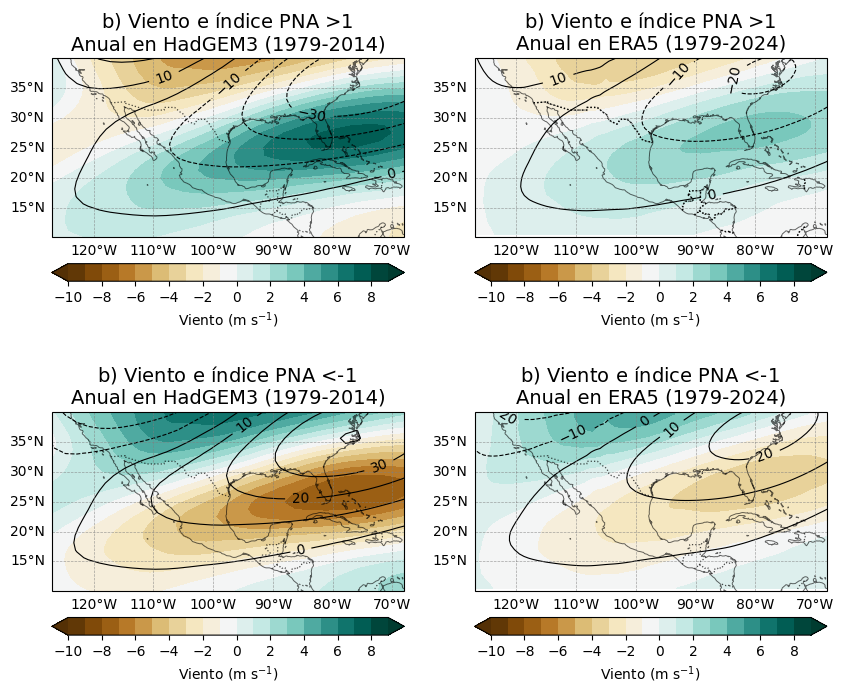

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})#, constrained_layout=True)
plt.subplots_adjust(wspace=0.2, hspace=0.35)
axs = axs.flatten()

# Subplot 1: ANUAL ÍNDICE >1 E5
ax = axs[1]
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(uE_idxp_vals.longitude,uE_idxp_vals.latitude,uE_idxp_vals,levels=np.arange(-10,10,),cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_gph_vals.longitude,idxp_gph_vals.latitude,idxp_gph_vals, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento (m s$^{-1}$)', fontsize=10)
ax.set_title('b$)$ Viento e índice PNA positivo \nAnual en ERA5 (1979-2024)', fontsize=12)

# Subplot 2: ANUAL ÍNDICE <-1 E5
ax = axs[3]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(uE_idxn_vals.longitude,uE_idxn_vals.latitude,uE_idxn_vals,levels=np.arange(-10,10,),cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxn_gph_vals.longitude,idxn_gph_vals.latitude,idxn_gph_vals, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento (m s$^{-1}$)', fontsize=10)
ax.set_title('b$)$ Viento e índice PNA <-1 \nAnual en ERA5 (1979-2024)', fontsize=14)

# Subplot 3: ANUAL ÍNDICE >1 HG
ax = axs[0]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(uH_idxp_vals.lon,uH_idxp_vals.lat,uH_idxp_vals,levels=np.arange(-10,10,),cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_zg_vals.lon,idxp_zg_vals.lat,idxp_zg_vals, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento (m s$^{-1}$)', fontsize=10)
ax.set_title('b$)$ Viento e índice PNA >1 \nAnual en HadGEM3 (1979-2014)', fontsize=14)

# Subplot 4: ANUAL ÍNDICE <-1 HG
ax = axs[2]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(uH_idxn_vals.lon,uH_idxn_vals.lat,uH_idxn_vals,levels=np.arange(-10,10,),cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxn_zg_vals.lon,idxn_zg_vals.lat,idxn_zg_vals, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento (m s$^{-1}$)', fontsize=10)
ax.set_title('b$)$ Viento e índice PNA <-1 \nAnual en HadGEM3 (1979-2014)', fontsize=14)

# plt.show()

plt.savefig('figsok/Viento_anualyPNA')

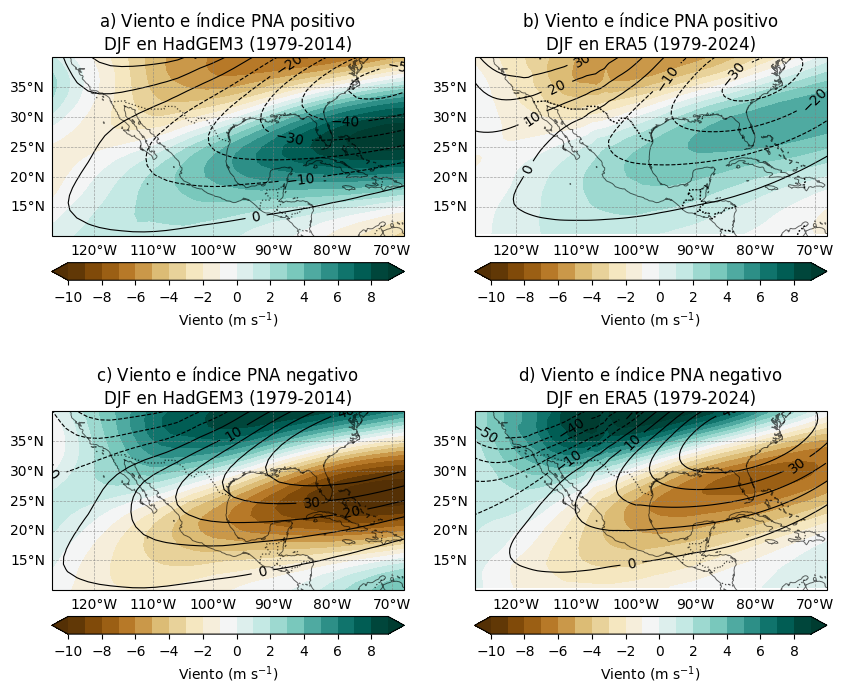

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})#, constrained_layout=True)
plt.subplots_adjust(wspace=0.2, hspace=0.35)
axs = axs.flatten()

# Subplot 1: ANUAL ÍNDICE >1 E5
ax = axs[1]
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(uE_idxp_djf.longitude,uE_idxp_djf.latitude,uE_idxp_djf,levels=np.arange(-10,10,),cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_gph_djf.longitude,idxp_gph_djf.latitude,idxp_gph_djf, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento (m s$^{-1}$)', fontsize=10)
ax.set_title('b$)$ Viento e índice PNA positivo \nDJF en ERA5 (1979-2024)', fontsize=12)

# Subplot 2: ANUAL ÍNDICE <-1 E5
ax = axs[3]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(uE_idxn_djf.longitude,uE_idxn_djf.latitude,uE_idxn_djf,levels=np.arange(-10,10,),cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxn_gph_djf.longitude,idxn_gph_djf.latitude,idxn_gph_djf, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento (m s$^{-1}$)', fontsize=10)
ax.set_title('d$)$ Viento e índice PNA negativo \nDJF en ERA5 (1979-2024)', fontsize=12)

# Subplot 3: ANUAL ÍNDICE >1 HG
ax = axs[0]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(uH_idxp_djf.lon,uH_idxp_djf.lat,uH_idxp_djf,levels=np.arange(-10,10,),cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_zg_djf.lon,idxp_zg_djf.lat,idxp_zg_djf, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento (m s$^{-1}$)', fontsize=10)
ax.set_title('a$)$ Viento e índice PNA positivo \nDJF en HadGEM3 (1979-2014)', fontsize=12)

# Subplot 4: ANUAL ÍNDICE <-1 HG
ax = axs[2]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(uH_idxn_djf.lon,uH_idxn_djf.lat,uH_idxn_djf,levels=np.arange(-10,10,),cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxn_zg_djf.lon,idxn_zg_djf.lat,idxn_zg_djf, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento (m s$^{-1}$)', fontsize=10)
ax.set_title('c$)$ Viento e índice PNA negativo \nDJF en HadGEM3 (1979-2014)', fontsize=12)

# plt.show()
plt.savefig('figsok/Viento_DJFyPNA')

## **<font color="Crimson"> GEOPOTENCIAL </font>**

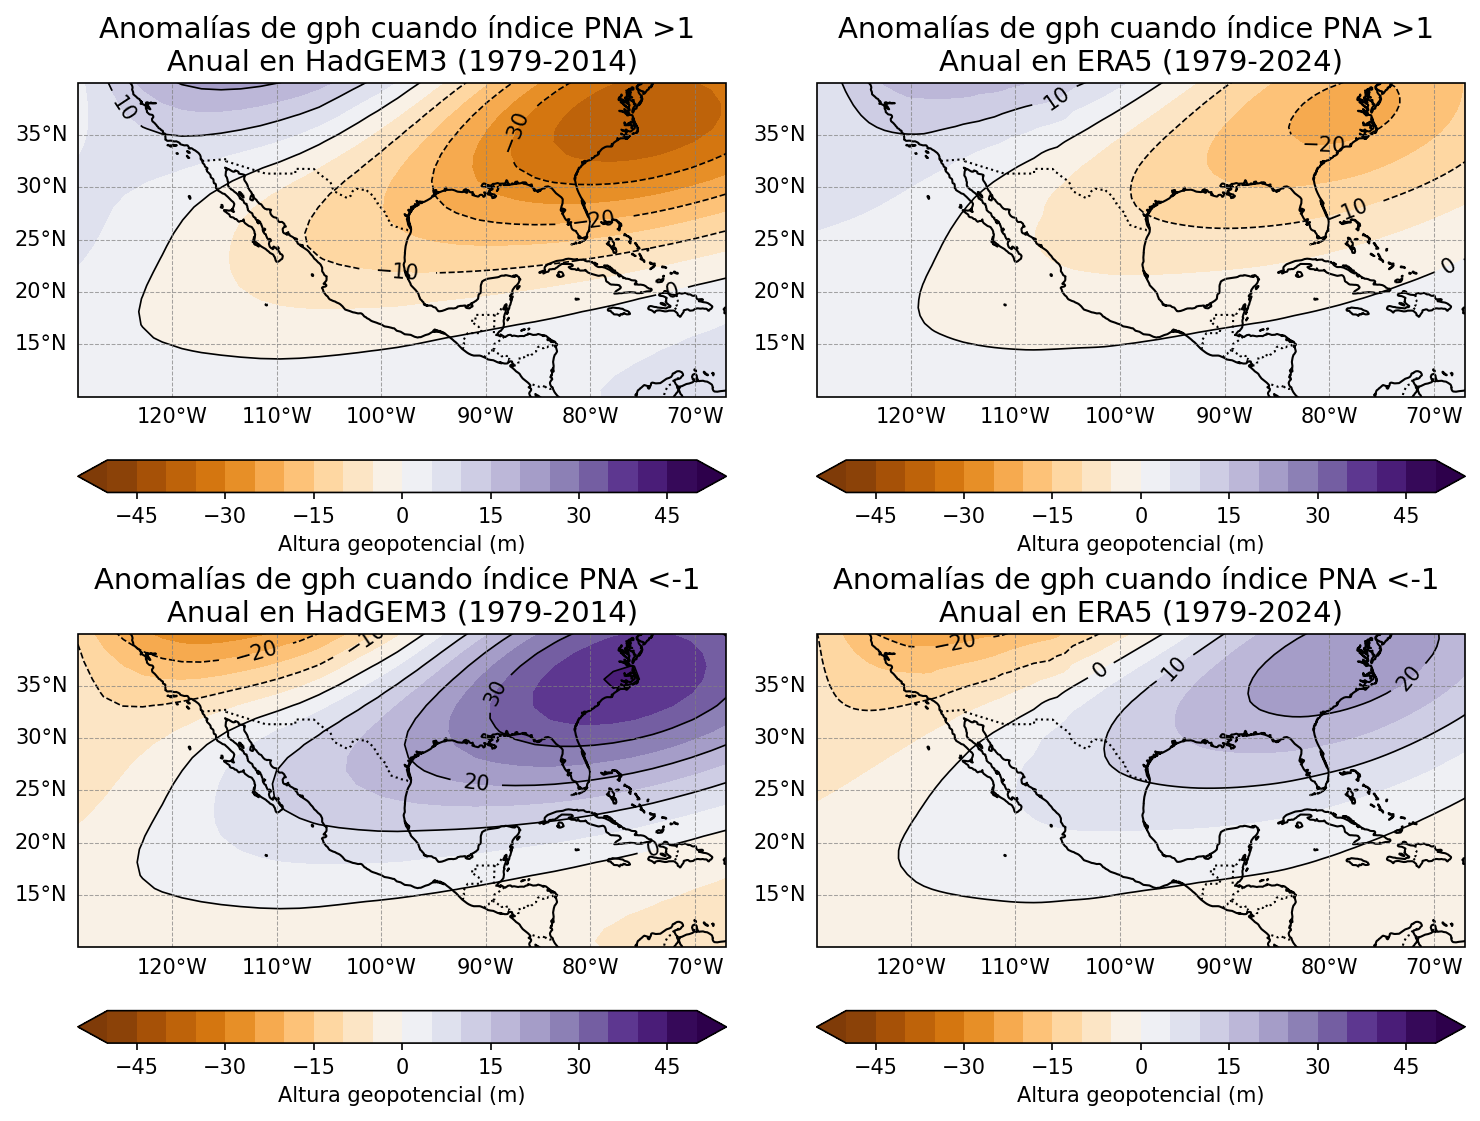

In [33]:
plt.figure(figsize=(10, 8), dpi=150)
plt.subplots_adjust(wspace=0.35,hspace=0.35)

# ------------------------ANUAL ÍNDICE POSITIVO e5
ax = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(idxp_gph_vals.longitude,idxp_gph_vals.latitude,idxp_gph_vals,levels=np.arange(-50,51,5),cmap='PuOr',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_gph_vals.longitude,idxp_gph_vals.latitude,idxp_gph_vals, levels=np.arange(-60, 60, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1,ax=ax)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice PNA >1 \nAnual en ERA5 (1979-2024)',fontsize=14)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------anual INDICE POSITIVO hg 
ax = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(idxp_zg_vals.lon,idxp_zg_vals.lat,idxp_zg_vals,levels=np.arange(-50,51,5),cmap='PuOr',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_zg_vals.lon,idxp_zg_vals.lat,idxp_zg_vals, levels=np.arange(-60, 60, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1,ax=ax)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice PNA >1 \nAnual en HadGEM3 (1979-2014)',fontsize=14)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------ANUAL INDICE NEGATIVO  E5
ax1 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax1.coastlines()
cs=ax1.contourf(idxn_gph_vals.longitude,idxn_gph_vals.latitude,idxn_gph_vals,levels=np.arange(-50,51,5),cmap='PuOr',extend='both',transform=ccrs.PlateCarree())
cc = ax1.contour(idxn_gph_vals.longitude,idxn_gph_vals.latitude,idxn_gph_vals, levels=np.arange(-60, 60, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax1.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax1.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax1.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice PNA <-1 \nAnual en ERA5 (1979-2024)',fontsize=14)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------ANUAL INDICE NEGATIVO  HG
ax1 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax1.coastlines()
cs=ax1.contourf(idxn_zg_vals.lon,idxn_zg_vals.lat,idxn_zg_vals,levels=np.arange(-50,51,5),cmap='PuOr',extend='both',transform=ccrs.PlateCarree())
cc = ax1.contour(idxn_zg_vals.lon,idxn_zg_vals.lat,idxn_zg_vals, levels=np.arange(-60, 60, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax1.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax1.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax1.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice PNA <-1 \nAnual en HadGEM3 (1979-2014)',fontsize=14)

plt.tight_layout(h_pad=4)
plt.subplots_adjust(top=.87)
plt.savefig('figsok/GPH_anualyPNA')

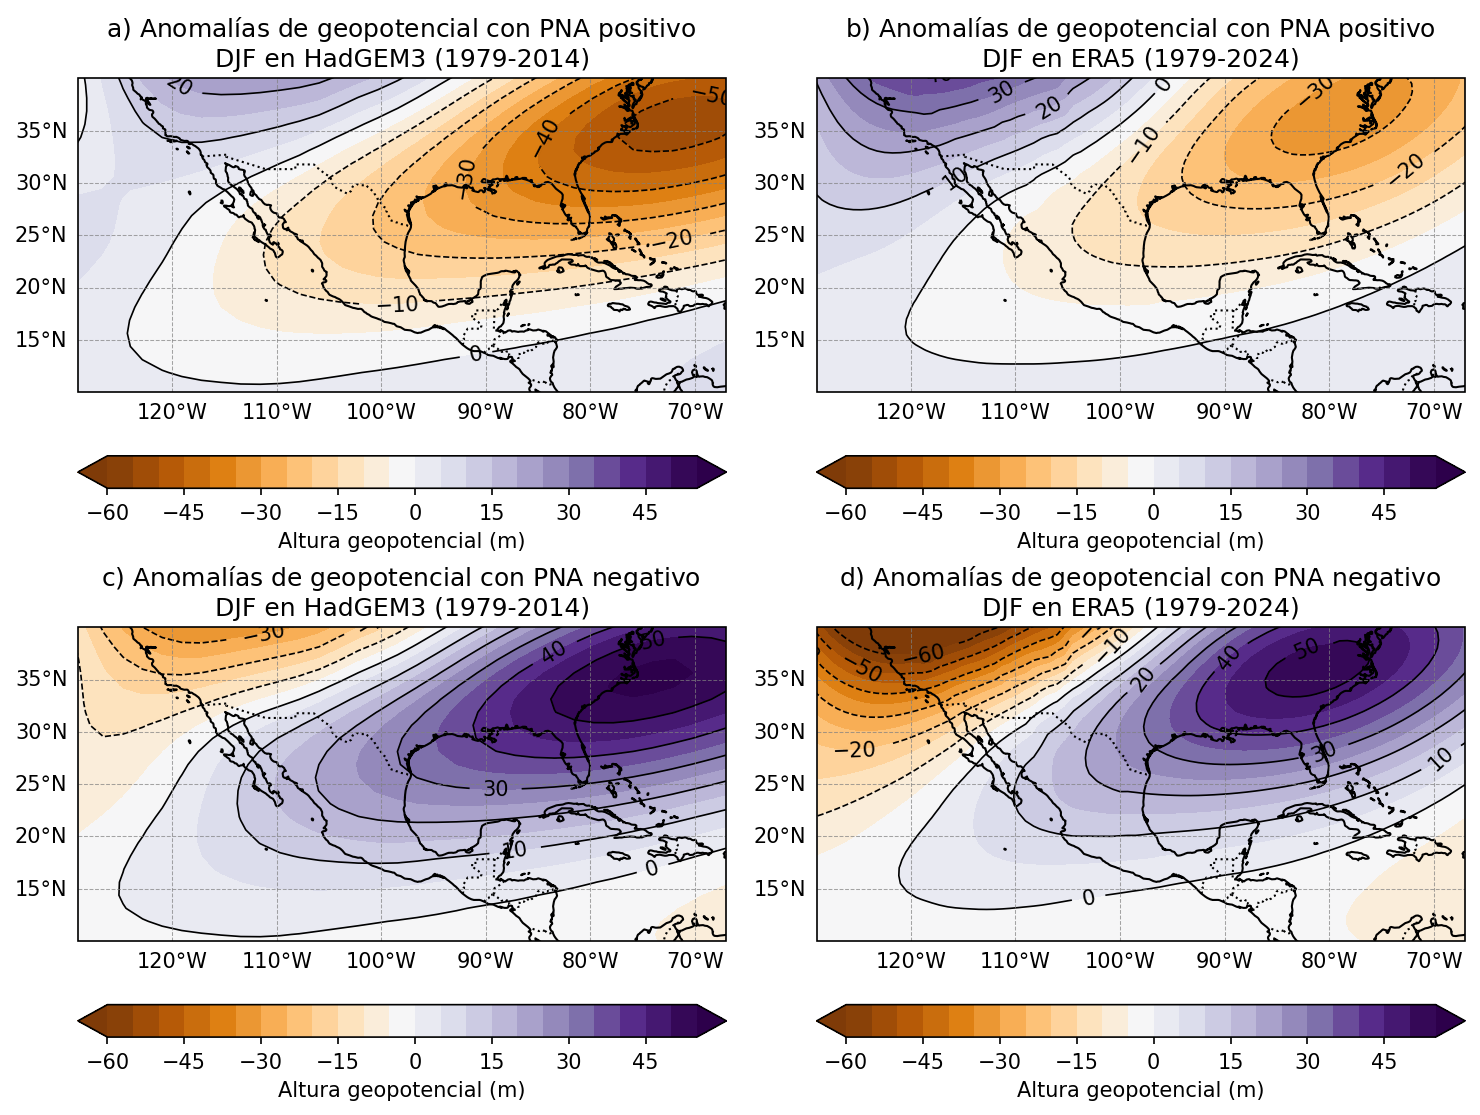

In [32]:
plt.figure(figsize=(10, 8), dpi=150)
plt.subplots_adjust(wspace=0.35,hspace=0.35)

# ------------------------djf ÍNDICE POSITIVO e5
ax = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(idxp_gph_djf.longitude,idxp_gph_djf.latitude,idxp_gph_djf,levels=np.arange(-60,60,5),cmap='PuOr',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_gph_djf.longitude,idxp_gph_djf.latitude,idxp_gph_djf, levels=np.arange(-60, 60, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1,ax=ax)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('b$)$ Anomalías de geopotencial con PNA positivo \nDJF en ERA5 (1979-2024)',fontsize=12)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------djf INDICE POSITIVO hg 
ax = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(idxp_zg_djf.lon,idxp_zg_djf.lat,idxp_zg_djf,levels=np.arange(-60,60,5),cmap='PuOr',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_zg_djf.lon,idxp_zg_djf.lat,idxp_zg_djf, levels=np.arange(-60, 60, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1,ax=ax)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('a$)$ Anomalías de geopotencial con PNA positivo \nDJF en HadGEM3 (1979-2014)',fontsize=12)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------djf INDICE NEGATIVO e5 
ax1 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax1.coastlines()
cs=ax1.contourf(idxn_gph_djf.longitude,idxn_gph_djf.latitude,idxn_gph_djf,levels=np.arange(-60,60,5),cmap='PuOr',extend='both',transform=ccrs.PlateCarree())
cc = ax1.contour(idxn_gph_djf.longitude,idxn_gph_djf.latitude,idxn_gph_djf, levels=np.arange(-60, 60, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax1.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax1.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax1.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('d$)$ Anomalías de geopotencial con PNA negativo \nDJF en ERA5 (1979-2024)',fontsize=12)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------DJF INDICE NEGATIVO
ax1 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax1.coastlines()
cs=ax1.contourf(idxn_zg_djf.lon,idxn_zg_djf.lat,idxn_zg_djf,levels=np.arange(-60,60,5),cmap='PuOr',extend='both',transform=ccrs.PlateCarree())
cc = ax1.contour(idxn_zg_djf.lon,idxn_zg_djf.lat,idxn_zg_djf, levels=np.arange(-60, 60, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax1.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax1.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax1.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('c$)$ Anomalías de geopotencial con PNA negativo \nDJF en HadGEM3 (1979-2014)',fontsize=12)

plt.tight_layout(h_pad=4)
plt.subplots_adjust(top=.87)
plt.savefig('figsok/GPH_DJFyPNA+-')